#  Multi Class Text Classification Of Consumer finance complaints

## 1.Data Acquisition
    -- Loading data from CSV file and saving into a data frame

In [1]:
#importing pandas and reading data from the file
import pandas as pd
df = pd.read_csv('/Users/geethapriya/Downloads/complaints.csv')
df.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2020-10-23,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,NaN,JPMORGAN CHASE & CO.,IL,60651,"Older American, Servicemember",NaN,Phone,2020-10-23,In progress,Yes,NaN,3915998
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2020-10-23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,334XX,NaN,Other,Web,2020-10-23,Closed with explanation,Yes,NaN,3915909
5,2020-11-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",CA,90606,NaN,NaN,Web,2020-11-01,Closed with explanation,Yes,NaN,3930377
6,2020-10-27,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,Alliance Data Card Services,MA,023XX,NaN,NaN,Web,2020-10-27,In progress,Yes,NaN,3922841
7,2020-10-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Alliance Data Card Services,NY,11429,NaN,NaN,Fax,2020-10-28,In progress,Yes,NaN,3921697
8,2019-09-15,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,Pioneer has committed several federal violatio...,NaN,Pioneer Capital Solutions Inc,CA,925XX,NaN,Consent provided,Web,2019-09-15,Closed with explanation,Yes,NaN,3374555
9,2019-07-26,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,"Previously, on XX/XX/XXXX, XX/XX/XXXX, and XX/...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,914XX,NaN,Consent provided,Web,2019-07-26,Closed with explanation,Yes,NaN,3319331


# Step 2: Preprocessing

##### In Preprocessing,
* We checked the data size, as it is a very huge data nearly 3292.4k our system can't support that much data so we filtered the latest two months data which is nearly 149k
* We have changed the column name "Consumer complaint narrative" as we thought that it is not appropriate for analysis "Consumer_complaint_narrative"
* We have checked for missing values, null values for all columns. We found them in Consumer Complaint narrative. 
* We dropped the missing values rows.

In [2]:
#Checking data size
print("Original data size : ",df.size)
df_new=df[df['Date received']>'2020-09-01']
print("Recent Customer complaints data ",df_new.size)
df_new.info()

Original data size :  32924682
Recent Customer complaints data  1499994
<class 'pandas.core.frame.DataFrame'>
Int64Index: 83333 entries, 2 to 1777915
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 83333 non-null  object
 1   Product                       83333 non-null  object
 2   Sub-product                   83333 non-null  object
 3   Issue                         83333 non-null  object
 4   Sub-issue                     77055 non-null  object
 5   Consumer complaint narrative  14065 non-null  object
 6   Company public response       46285 non-null  object
 7   Company                       83333 non-null  object
 8   State                         78916 non-null  object
 9   ZIP code                      72981 non-null  object
 10  Tags                          7547 non-null   object
 11  Consumer consent provided?    45879 non-null  object
 12  

In [3]:
#Changing column names
col = ['Product', 'Consumer complaint narrative']
df_new = df_new[col]
df_new.columns = ['Product','Consumer_complaint_narrative']


In [4]:
#check for  null values
df_new['Consumer_complaint_narrative'].isnull().value_counts()

True     69268
False    14065
Name: Consumer_complaint_narrative, dtype: int64

In [5]:
print(df_new['Consumer_complaint_narrative'].isnull().sum())

69268


In [6]:
df_new['Product'].unique()

array(['Mortgage',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card', 'Checking or savings account',
       'Debt collection',
       'Money transfer, virtual currency, or money service',
       'Vehicle loan or lease', 'Student loan',
       'Payday loan, title loan, or personal loan'], dtype=object)

In [7]:
#Dropping NaN values
print("data size before dropping null values",df_new.size)
df_new = df_new[pd.notnull(df_new['Consumer_complaint_narrative'])]
print("data size after dropping null values",df_new.size)

data size before dropping null values 166666
data size after dropping null values 28130


In [8]:
df_new['category_id'] = df_new['Product'].factorize()[0]
from io import StringIO
category_id_df = df_new[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
category_to_id = dict(category_id_df.values)
print(category_id_df)


                                                  Product  category_id
34      Credit reporting, credit repair services, or o...            0
29476                                            Mortgage            1
78564                         Credit card or prepaid card            2
102428                                    Debt collection            3
129712                        Checking or savings account            4
163765  Money transfer, virtual currency, or money ser...            5
165488                              Vehicle loan or lease            6
206382                                       Student loan            7
267595          Payday loan, title loan, or personal loan            8


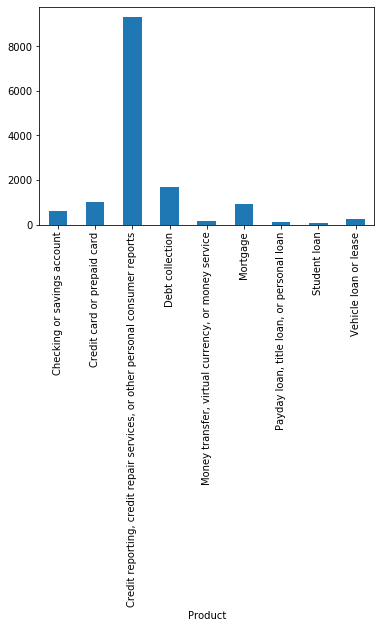

In [9]:
#visualizing number of complaints per product
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
df_new.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

* We see that the number of complaints per product is imbalanced. Consumers’ complaints are more biased towards Credit reporting, credit repair services, or other personal consumer reports.
* In these type of problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration.

**Text preprocessing**

**Extracting features from text using Bag Of Words** 
* sublinear_df is set to True to use a logarithmic form for frequency.
* min_df is the minimum numbers of documents a word must be present in to be kept.
* norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
* ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
* stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), 
                        stop_words='english')

features = tfidf.fit_transform(df_new.Consumer_complaint_narrative).toarray()
labels = df_new.category_id
features.shape

(14065, 33085)

* Now each of 14065 consumer complaint narratives is represented by 33085 features

In [11]:
# Finding the most correlated words
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Checking or savings account':
  . Most correlated unigrams:
       . branch
       . bonus
  . Most correlated bigrams:
       . checking account
       . savings account
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . citi
       . card
  . Most correlated bigrams:
       . synchrony bank
       . credit card
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
       . money
       . bank
  . Most correlated bigrams:
       . credit report
       . wells fargo
# 'Debt collection':
  . Most correlated unigrams:
       . collect
       . debt
  . Most correlated bigrams:
       . collection agency
       . collect debt
# 'Money transfer, virtual currency, or money service':
  . Most correlated unigrams:
       . transfer
       . wire
  . Most correlated bigrams:
       . wire transfer
       . cash app
# 'Mortgage':
  . Most correlated unigrams:
       . escrow
       . mortgage
  . Most correlated b

## Design and features of multi-class classifier

## 1. Naive Bayes Classifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df_new['Consumer_complaint_narrative'], df_new['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [13]:
print(clf.predict(count_vect.transform(["I have 3 mortgage hard inquiries on all three credit bureaus I didnt not authorized or have any knowledge of. As they should see, I have no open mortgage accounts. Also, I have 1 extra hard inquiries on equifax from a car dealership that I have no knowledge of. I have called the credit bureaus to dispute the hard inquiries but no help."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [14]:
df_new[df_new['Consumer_complaint_narrative'] == "I have 3 mortgage hard inquiries on all three credit bureaus I didnt not authorized or have any knowledge of. As they should see, I have no open mortgage accounts. Also, I have 1 extra hard inquiries on equifax from a car dealership that I have no knowledge of. I have called the credit bureaus to dispute the hard inquiries but no help."]

,Product,Consumer_complaint_narrative,category_id
355893,"Credit reporting, credit repair services, or o...",I have 3 mortgage hard inquiries on all three ...,0
453184,"Credit reporting, credit repair services, or o...",I have 3 mortgage hard inquiries on all three ...,0


In [15]:
print(clf.predict(count_vect.transform(["As I explained to this company that I was unfamiliar with this debt and that I don't believe I owe this money."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [16]:
df_new[df_new['Consumer_complaint_narrative'] == "As I explained to this company that I was unfamiliar with this debt and that I don't believe I owe this money."]

,Product,Consumer_complaint_narrative,category_id
355823,Debt collection,As I explained to this company that I was unfa...,3


In [17]:
print(clf.predict(count_vect.transform(["This is a NEW complaint. Select portfolio servicing did not ATTEMPT to collect a debt not owed. They have {$250000.00} for a debt in dispute XX/XX/2020 select portfolio servicing provided a payoff statement in the amount of {$250000.00} to the title company. XXXX XXXX  collected this amount that was wired to sps that day. XXXX XXXX sps returned the money to the title company which because there was no release provided was promptly returned to Sps. Sps then returned the money to XXXX XXXX. XX/XX/XXXX sps received a check for {$250000.00} from my proceeds from XXXX. No releases have been recorded and I still do not have my proceeds"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [18]:
print(clf.predict(count_vect.transform(["I have become a victim of Identity Theft and have had several credit accounts and collections show up on my credit report over the past few months. With the recent data breaches I am certain my information was leaked from this and shared. I've completed the proper steps, 1. notify creditors 2. police report 3. informed the state of Texas. The individual I've suspected for this theft is now deceased, and the police department said to contact the federal trade commission to seek relief."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [19]:
df_new[df_new['Consumer_complaint_narrative'] == "I have become a victim of Identity Theft and have had several credit accounts and collections show up on my credit report over the past few months. With the recent data breaches I am certain my information was leaked from this and shared. I've completed the proper steps, 1. notify creditors 2. police report 3. informed the state of Texas. The individual I've suspected for this theft is now deceased, and the police department said to contact the federal trade commission to seek relief."]

,Product,Consumer_complaint_narrative,category_id
351115,Debt collection,I have become a victim of Identity Theft and h...,3
380801,Debt collection,I have become a victim of Identity Theft and h...,3
407137,Debt collection,I have become a victim of Identity Theft and h...,3
439505,Debt collection,I have become a victim of Identity Theft and h...,3


In [20]:
clf.predict(count_vect.transform(["Hi, how can you be late and past due on collection accounts? Why are you failing to provide me detail request to validate this account? I was shocked when I reviewed my credit report this week and I found multiple inaccuracies on my credit report from the 3 major credit bureaus from a collection company that I never have dealt with before. I've attempted several times to ratify the issue with the original creditors and credit bureaus and they still reporting inaccurate, unverifiable information. I have disputed this item with the credit reporting agency and they reported you confirmed the account as valid. I honestly do not believe to ever have any relationship with this collection agency or original creditor. Also there are several inaccuracies with this account the way it's reporting and that's a total violation of FCRA and FDCPA laws and regulations. In a good faith effort to resolve the matter amicably, I must demand proof of this debt, specifically the alleged contract or other instrument bearing my signature, as well as proof of your authority in this matter. Absent such proof, you must correct any erroneous reports of this past debt as mine. I am writing to request that you please provide the following information : 1. Please evidence your authorization under 15 USC 1692 ( e ) and 15 USC 1692 ( f ) in this alleged matter. 2. What is your authorization of law for your collection of information? 3. What is your authorization of law for your collection of this alleged debt? 4. Please evidence your authorization to do business or operate in this state. 5. Please evidence proof of the alleged debt, including the alleged contract or other instrument bearing my signature. 6. Please provide a complete account history, including any charges added for collection activity.You have 30 days upon receipt of this letter to provide strict proof of contract. In the event you can not provide strict proof of contract, you must cease and desist any and all collection efforts and immediately remove any derogatory information reported to the consumer reporting agencies. In addition, you will need to provide me your agreement, in writing, that you are closing your file, ceasing collecting activity, and deleting all information related to this reference number from any and all credit reports youve furnished the information to. In the event you transfer this account to an attorney without providing proof of contract, and proving your claim, he/she will be immediate reported to the XXXX XXXX XXXX and XXXX XXXX XXXX for code of ethics violations."]))

array(['Credit reporting, credit repair services, or other personal consumer reports'],
      dtype='<U76')

In [21]:
clf.predict(count_vect.transform(["Problem using a debit or ATM card"]))

array(['Credit card or prepaid card'], dtype='<U76')

In [22]:
df_new[df_new['Consumer_complaint_narrative'] == "Problem using a debit or ATM card"]

,Product,Consumer_complaint_narrative,category_id


In [23]:
clf.predict(count_vect.transform(["XXXX XXXX XXXX XXXX XXXX {$1300.00} {$820.00} CHARGE-OFF XXXX XXXX XXXX XXXX XX/XX/XXXXXXXX XXXX XXXX XXXX, XX/XX/XXXXXXXX Previous Address : XXXX XX/XX/XXXXXXXX XXXX XXXX XXXX XXXX,XX/XX/XXXX XXXX Previous Address : XXXX XXXX XXXX APT XX/XX/XXXX, XXXX, XX/XX/XXXX XXXX Previous Address : XXXX XXXX XXXX XXXX XXXX, XX/XX/XXXX XXXX"]))

array(['Credit reporting, credit repair services, or other personal consumer reports'],
      dtype='<U76')

In [24]:
df_new[df_new['Consumer_complaint_narrative'] == "Debt is not yours"]

,Product,Consumer_complaint_narrative,category_id


In [25]:
clf.predict(count_vect.transform(["Debt is not yours"]))

array(['Credit reporting, credit repair services, or other personal consumer reports'],
      dtype='<U76')

# Model Selection
 
We will now do experiment with different machine learning models by evaluating their accuracy for the following four models:

* Logistic Regression
* (Multinomial) Naive Bayes
* Linear Support Vector Machine
* Random Forest

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=1200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0,max_iter=10000),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])



* Accessing model accuracy through visualizations

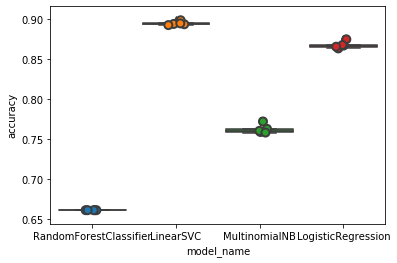

In [27]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [28]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.894774
LogisticRegression        0.867757
MultinomialNB             0.762531
RandomForestClassifier    0.661216
Name: accuracy, dtype: float64

#  Linear SVC 
### Model Evaluation
 
* Continuing with our best model (LinearSVC), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

In [29]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_new.index, test_size=0.25, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_new.index, test_size=0.40, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

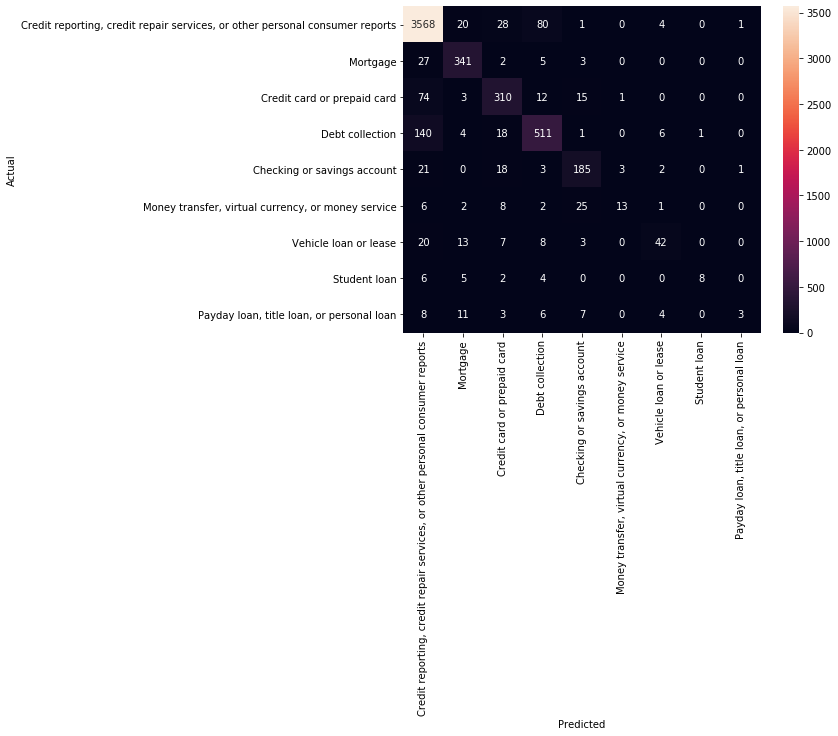

In [35]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

* The  majority of the predictions end up on the diagonal (predicted label = actual label). However, there are a number of misclassifications, and it might be interesting to see what those

In [36]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df_new.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 27 examples.


,Product,Consumer_complaint_narrative
271767,Mortgage,I was overdue on my mortgage payment just past...
496099,Mortgage,"XX/XX/2020, I filed complaint number XXXX rega..."
392061,Mortgage,I applied for a loan mod in XX/XX/XXXX2020 and...
523095,Mortgage,Loan # XXXX XXXX attempt at resolution. \n\nI ...
431595,Mortgage,This letter is part of investigation of fraud ...
511348,Mortgage,We were charged loan amount points we never di...
531827,Mortgage,I restarted a refinance with this loan company...
458638,Mortgage,Dr XXXX XXXX ( Social Security XXXX ; CA DL XX...
430885,Mortgage,As of XX/XX/2020 SLS manually reported to the ...
498325,Mortgage,I current behind by couple months with mortgag...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 74 examples.


,Product,Consumer_complaint_narrative
534236,Credit card or prepaid card,"A month after covids happens, Citi decided to ..."
495568,Credit card or prepaid card,On XX/XX/2020 I attempted to withdraw {$500.00...
438875,Credit card or prepaid card,On XX/XX/2020 a dispute was entered for the am...
344027,Credit card or prepaid card,The company saying i made late payments and it...
467491,Credit card or prepaid card,ON XX/XX/XXXX I was fraudulently charged on my...
...,...,...
491072,Credit card or prepaid card,Unauthorized charges/purchase on Tuesday XX/XX...
410806,Credit card or prepaid card,COMPLAINT ABOUT A FINANCIAL INSTITUTION/CREDIT...
678437,Credit card or prepaid card,I had problem with Macy 's Credit Card over th...
420865,Credit card or prepaid card,How are you doing during this pandemic? Hoping...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 140 examples.


,Product,Consumer_complaint_narrative
575588,Debt collection,I never opened an account with this company. I...
516600,Debt collection,I am the victim of ID THEFT and my name and SS...
531492,Debt collection,"Dear Sir/Madam, I have contacted the company C..."
444117,Debt collection,This debt was already paid in full. I have a {...
445227,Debt collection,On XX/XX/XXXX I received notification from XXX...
...,...,...
532992,Debt collection,I mailed out four dispute letters via certifie...
352993,Debt collection,"Hello, and I hope all is well. While reviewing..."
490915,Debt collection,Ability Recovery somehow refuses to acknowledg...
518666,Debt collection,Experian Reported complaints : XXXX XXXX a med...



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 21 examples.


,Product,Consumer_complaint_narrative
559411,Checking or savings account,I am the victim of identity theft with Bank of...
400757,Checking or savings account,Sun Trust Bank allowed an account to be opened...
421742,Checking or savings account,Yeah there's been a lot of fraudulent in my ac...
484655,Checking or savings account,"I am a victim of the 2016 "" XXXX Data Breach ..."
506844,Checking or savings account,"XX/XX/XXXX, an Alliant Banking representative ..."
357680,Checking or savings account,"I am a victim of the 2016 "" XXXX Data Breach '..."
518644,Checking or savings account,I believe I've been a victim of identity test....
469140,Checking or savings account,I have a complaint which I would like to submi...
530148,Checking or savings account,navy federal froze my checking an saving accts...
1477336,Checking or savings account,I spent 2 says 6 weeks ago putting through com...



'Money transfer, virtual currency, or money service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 6 examples.


,Product,Consumer_complaint_narrative
363627,"Money transfer, virtual currency, or money ser...",This guy on XXXX is doing a fraud bible and he...
409523,"Money transfer, virtual currency, or money ser...","My boyfriend and I were scammed out of a dog, ..."
378071,"Money transfer, virtual currency, or money ser...",I went to cash a check at XXXX XXXX it said it...
380644,"Money transfer, virtual currency, or money ser...",I Purchased a baby kitten on XXXX for {$300.00...
393886,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX I received an email notification...
198989,"Money transfer, virtual currency, or money ser...",I booked a vacation home through people named ...



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 20 examples.


,Product,Consumer_complaint_narrative
518790,Vehicle loan or lease,On XXXX XXXX I submitted a vehicle loan applic...
510626,Vehicle loan or lease,I paid off the loan in XX/XX/2020 but they are...
393749,Vehicle loan or lease,They sent me a settlement and refused to honor.
438085,Vehicle loan or lease,"In XX/XX/2020, I was shopping for interest rat..."
545468,Vehicle loan or lease,I have contacted Ally Financial several times ...
433009,Vehicle loan or lease,Kia motor finance applied a payment in XX/XX/2...
407646,Vehicle loan or lease,I XXXX XXXX am a victim of identity theft and ...
450806,Vehicle loan or lease,Bridgcrest I have XXXX XXXX XXXX that is XXXX...
311954,Vehicle loan or lease,I am being harassed by this company I am final...
496752,Vehicle loan or lease,Santander keeps on adding additional fees to m...



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 6 examples.


,Product,Consumer_complaint_narrative
439536,Student loan,I have multiple lateness/missed payments on my...
409023,Student loan,I have had to call Mohela Monthly in order for...
584749,Student loan,Never received settlements from courts ruling....
549143,Student loan,I was wrongly consulted about my student loan ...
397277,Student loan,I took out loans for XXXX school. As I approac...
400447,Student loan,The Institute closed after I graduated in 2015...



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 8 examples.


,Product,Consumer_complaint_narrative
443619,"Payday loan, title loan, or personal loan",Well I did application online for Prosper now ...
430956,"Payday loan, title loan, or personal loan","Good day, I wanted to surprise my husband with..."
423515,"Payday loan, title loan, or personal loan",I have sent the company notices this is a debt...
423806,"Payday loan, title loan, or personal loan",Lobel financial all of a sudden took away the ...
358179,"Payday loan, title loan, or personal loan",XX/XX/2020 ( Approximately ) I spoke with a re...
510592,"Payday loan, title loan, or personal loan",I have had so many issues with Citibank. I rec...
488312,"Payday loan, title loan, or personal loan",Recently I took out an XXXX personal loan with...
340731,"Payday loan, title loan, or personal loan",Tower Loan has been running hard inquiries on ...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 20 examples.


,Product,Consumer_complaint_narrative
408927,"Credit reporting, credit repair services, or o...",My mortgage loan was service transferred to Ne...
444500,"Credit reporting, credit repair services, or o...",There is an item on my credit reported dated o...
686950,"Credit reporting, credit repair services, or o...",Signed a contract in which I received merchand...
438313,"Credit reporting, credit repair services, or o...",I applied for a refinance loan on a property w...
344965,"Credit reporting, credit repair services, or o...",it started in XXXX when my wife passed away. i...
346928,"Credit reporting, credit repair services, or o...",all bureaus ( 20 ) companies are claiming data...
438838,"Credit reporting, credit repair services, or o...",I went into forbearance around COVID and was g...
372246,"Credit reporting, credit repair services, or o...",We contacted our Lender about a refinance in X...
366756,"Credit reporting, credit repair services, or o...",( 1 ) Attached First Qualified Written Request...
413568,"Credit reporting, credit repair services, or o...",I had a forbearance agreement with my former m...



'Vehicle loan or lease' predicted as 'Mortgage' : 13 examples.


,Product,Consumer_complaint_narrative
270426,Vehicle loan or lease,I have asked for the last 4 payments XXXX {$65...
404531,Vehicle loan or lease,My sister and I applied for an RV loan at XXXX...
419550,Vehicle loan or lease,On XX/XX/2020 I was advised that Wells Fargo i...
349737,Vehicle loan or lease,Please ITEMIZE My Payments to reflect how they...
361336,Vehicle loan or lease,Today at XXXX I called Nissan Financial to ask...
425370,Vehicle loan or lease,"Early XX/XX/2020, I received notification from..."
348649,Vehicle loan or lease,I have been making payments to Sun Trust Bank ...
414677,Vehicle loan or lease,I have made almost XXXX in payments and my loa...
386421,Vehicle loan or lease,1. USBank plays favorites. My lease buyout wit...
542735,Vehicle loan or lease,Loan amount of $ XXXX ( +/- ) was funded XXXX....



'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 11 examples.


,Product,Consumer_complaint_narrative
383614,"Payday loan, title loan, or personal loan",Ive already tried to contact the company to re...
441932,"Payday loan, title loan, or personal loan",Question loan amount Never sent information wh...
362882,"Payday loan, title loan, or personal loan",I had my payments on my loan set up to come ou...
527320,"Payday loan, title loan, or personal loan",Received two pace loans from ygrene. When sold...
382345,"Payday loan, title loan, or personal loan",1. Applied for loan program for a personal loa...
302905,"Payday loan, title loan, or personal loan",I called CashLinkUsa to extend my loan for add...
337778,"Payday loan, title loan, or personal loan","XX/XX/2020 Loan Company Credova Financial LLC,..."
338918,"Payday loan, title loan, or personal loan",Wells Fargo is XXXX. They give XXXX XXXX XXX...
413673,"Payday loan, title loan, or personal loan",This company added XXXX extra to my principle....
446712,"Payday loan, title loan, or personal loan",I was under impression that XXXX loan would be...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 28 examples.


,Product,Consumer_complaint_narrative
531685,"Credit reporting, credit repair services, or o...",I have been a Citibank customer since XXXX. In...
353327,"Credit reporting, credit repair services, or o...",I had a credit card through XXXX XXXX with a {...
441079,"Credit reporting, credit repair services, or o...",XX/XX/2020 I called on : XX/XX/2020 Synchrony ...
384531,"Credit reporting, credit repair services, or o...",I paid off my Synchrony Lowes account. After t...
398705,"Credit reporting, credit repair services, or o...",XXXX continue too not help in this matter ive ...
285957,"Credit reporting, credit repair services, or o...",Its a pandemic and I was late a couple days on...
340464,"Credit reporting, credit repair services, or o...",CITI bank Costco Visa card wrongfully flagged ...
362392,"Credit reporting, credit repair services, or o...",I have been a XXXX customer since XXXX. In XX/...
352885,"Credit reporting, credit repair services, or o...",I requested Barclays Card Co. to pay me back {...
414390,"Credit reporting, credit repair services, or o...","On XX/XX/2020 I received a notification that ""..."



'Debt collection' predicted as 'Credit card or prepaid card' : 18 examples.


,Product,Consumer_complaint_narrative
529076,Debt collection,please help me with these credited loans shark...
447733,Debt collection,"Home Depot Credit Services, XXXX. XXXX XXXX X..."
414473,Debt collection,I was not notified that my account was being c...
372145,Debt collection,My hsn account was transferred from XXXX XXXX ...
260603,Debt collection,XXXX XXXX complaints : I.C Systems a medical ...
350756,Debt collection,I have or had a Sychrony Home credit card. Whe...
413848,Debt collection,filing a compliant against Synchrony Bank payp...
347740,Debt collection,i was a victim of fraud and identity theft. so...
415757,Debt collection,This was due to an over drawn back account was...
534077,Debt collection,XXXXSynchrony bank offered me a promotional pu...



'Checking or savings account' predicted as 'Credit card or prepaid card' : 18 examples.


,Product,Consumer_complaint_narrative
372864,Checking or savings account,Tickets that I bought for a concert were cance...
408649,Checking or savings account,On XX/XX/2020 I made a XXXX transaction for an...
380606,Checking or savings account,Credit card was closed by bank w/o warrant so ...
419174,Checking or savings account,The claim number with wells fargo is # XXXX {$...
269798,Checking or savings account,They sent duplicates of my card to an old addr...
496984,Checking or savings account,"Banco Popular de Puerto Rico, XXXX XXXX branch..."
515127,Checking or savings account,Attempted to contact PNC by phone several time...
374246,Checking or savings account,Without any proper notice I was informed that ...
390505,Checking or savings account,On XX/XX/2020 I was scammed. I immediately con...
362644,Checking or savings account,I received a US Bank ReliaCard as a part of th...



'Money transfer, virtual currency, or money service' predicted as 'Credit card or prepaid card' : 8 examples.


,Product,Consumer_complaint_narrative
482106,"Money transfer, virtual currency, or money ser...",I opened a Citi gold account ; linked my XXXX ...
415038,"Money transfer, virtual currency, or money ser...",Paypal transaction XXXX for items purchased on...
350381,"Money transfer, virtual currency, or money ser...",Paypal permanently locked my account and will ...
458636,"Money transfer, virtual currency, or money ser...",USBank recieved my PA unemployment benefits an...
481789,"Money transfer, virtual currency, or money ser...",XX/XX/XXXX I received {$15000.00} From XXXX XX...
520733,"Money transfer, virtual currency, or money ser...",Paypal online message exchange below indicates...
1777915,"Money transfer, virtual currency, or money ser...",This is the second time in a few weeks that Ve...
509748,"Money transfer, virtual currency, or money ser...","PayPal has "" permanently limited '' my account..."



'Vehicle loan or lease' predicted as 'Credit card or prepaid card' : 7 examples.


,Product,Consumer_complaint_narrative
419075,Vehicle loan or lease,I see multiple 30 days late marks which is a c...
585959,Vehicle loan or lease,My NJ car lease matured on XX/XX/2020 during C...
451857,Vehicle loan or lease,I bought a XXXX XXXX XXXX around XX/XX/XXXX. A...
390629,Vehicle loan or lease,I see multiple 30 days late marks which is a c...
232904,Vehicle loan or lease,I received a letter from the company that my l...
395867,Vehicle loan or lease,"I called the company to make a payment, which ..."
405994,Vehicle loan or lease,I see multiple 30 days late marks which is a c...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 80 examples.


,Product,Consumer_complaint_narrative
446425,"Credit reporting, credit repair services, or o...",I have disputed the debt owed with the company...
490914,"Credit reporting, credit repair services, or o...",I am a victim of identity theft. Due to the Co...
367993,"Credit reporting, credit repair services, or o...",I have an unverified account from XXXX XXXX XX...
393998,"Credit reporting, credit repair services, or o...",XXXX REFUSE TO BELIVE that I am who I am I ma...
496718,"Credit reporting, credit repair services, or o...",Ive had numerous complaints with this company....
...,...,...
447040,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I spoke with XXXX regarding the ...
445690,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I reached out to XXXX XXXX XXXX ...
371647,"Credit reporting, credit repair services, or o...",On XX/XX/2020 I sent a request to Kay Jewelers...
535962,"Credit reporting, credit repair services, or o...",I have sent XXXX XXXX XXXX multiple certified ...



'Credit card or prepaid card' predicted as 'Debt collection' : 12 examples.


,Product,Consumer_complaint_narrative
485287,Credit card or prepaid card,Back in XXXX while XXXX to XXXX XXXX I request...
511188,Credit card or prepaid card,I tried to make the payment and it didnt go th...
340042,Credit card or prepaid card,This will be my final attempt to resolve this ...
344072,Credit card or prepaid card,This account was closed by mistake. I had inte...
217104,Credit card or prepaid card,2020 Sam 's Club Synchrony Bank MC. All accoun...
422270,Credit card or prepaid card,Hi there was a statement was send to my house ...
356085,Credit card or prepaid card,As of XX/XX/2020 I got a notice from XXXX XXXX...
393839,Credit card or prepaid card,I am a victim of identity theft. Due to the Co...
356859,Credit card or prepaid card,To Whom This May Concern at the Federal Trade ...
382734,Credit card or prepaid card,"On XX/XX/XXXX, I received a letter saying my a..."



'Vehicle loan or lease' predicted as 'Debt collection' : 8 examples.


,Product,Consumer_complaint_narrative
531548,Vehicle loan or lease,I have disputed this account and have reached ...
482592,Vehicle loan or lease,I owed Kia on property taxes. \nMade an arrang...
516841,Vehicle loan or lease,SANTANDER CONSUMER USA XXXX XXXX XXXX XXXX TX ...
439292,Vehicle loan or lease,I have disputed this account and have reached ...
363370,Vehicle loan or lease,I have been in constant contact w/ my auto fin...
383380,Vehicle loan or lease,XX/XX/2020 the bank had a tow truck company st...
423164,Vehicle loan or lease,My monthly bill is due on the XXXX of each mon...
437920,Vehicle loan or lease,"On XX/XX/2020, CarMax presented me with a frau..."



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 6 examples.


,Product,Consumer_complaint_narrative
441817,"Payday loan, title loan, or personal loan",""" loan Agreement '' is written in confusing le..."
361328,"Payday loan, title loan, or personal loan",I received information from you attempting to ...
492185,"Payday loan, title loan, or personal loan",I received information from you attempting to ...
398678,"Payday loan, title loan, or personal loan","On Saturday XX/XX/2018, my husband and I went ..."
520208,"Payday loan, title loan, or personal loan",I received information from you attempting to ...
442355,"Payday loan, title loan, or personal loan",I received {$2000.00} from a XXXX XXXX. I pai...



'Credit card or prepaid card' predicted as 'Checking or savings account' : 15 examples.


,Product,Consumer_complaint_narrative
387220,Credit card or prepaid card,Since the beginning of XXXX I have been collec...
380607,Credit card or prepaid card,-citibank offered {$1500.00} if I deposit {$20...
472824,Credit card or prepaid card,{$1500.00} transferred to a bank acct fraudule...
374189,Credit card or prepaid card,I have had this card for years. I pay it in fu...
485681,Credit card or prepaid card,"I have been a customer since XXXX, I have neve..."
389530,Credit card or prepaid card,I have an account at Santander as well as all ...
490826,Credit card or prepaid card,I received a letter dated XX/XX/XXXX that my a...
454463,Credit card or prepaid card,- The issue concerns a Discover credit card se...
436899,Credit card or prepaid card,On the morning of XX/XX/XXXX my credit card wa...
363559,Credit card or prepaid card,US bank closed my account without any notifica...



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 25 examples.


,Product,Consumer_complaint_narrative
476084,"Money transfer, virtual currency, or money ser...",I was once a cryptocurrency trade on a mobile ...
504562,"Money transfer, virtual currency, or money ser...",I was contacted by XXXX XXXX XXXX XXXX who off...
341077,"Money transfer, virtual currency, or money ser...",On XXXX 2020 I had an IRA/CD mature with BMO/H...
387224,"Money transfer, virtual currency, or money ser...",This is a continuous complaint according to a ...
548216,"Money transfer, virtual currency, or money ser...",The reason for filing is complaint is I sold a...
528918,"Money transfer, virtual currency, or money ser...","On XX/XX/XXXX and XX/XX/XXXX, one unauthorized..."
382565,"Money transfer, virtual currency, or money ser...",I was contacted by XXXX XXXX XXXX XXXX who off...
405980,"Money transfer, virtual currency, or money ser...","On numerous occasions since XX/XX/2019, I as w..."
523750,"Money transfer, virtual currency, or money ser...","On XX/XX/2020, I attempted to send my Nephew {..."
369279,"Money transfer, virtual currency, or money ser...",I was scammed for a puppy for my children. I d...



'Payday loan, title loan, or personal loan' predicted as 'Checking or savings account' : 7 examples.


,Product,Consumer_complaint_narrative
459504,"Payday loan, title loan, or personal loan",Yes I got a loan from them for {$1000.00} and ...
436796,"Payday loan, title loan, or personal loan","After Hurricane Sally, I received several text..."
447691,"Payday loan, title loan, or personal loan",I applied for a person loan with Wells Fargo a...
299752,"Payday loan, title loan, or personal loan",US Bank coerced me into adding a reserve line ...
453649,"Payday loan, title loan, or personal loan","Hello, I am writing on behalf of Wells Fargo n..."
508404,"Payday loan, title loan, or personal loan",I didnt realize it was going to be this bad. M...
383094,"Payday loan, title loan, or personal loan",We are writing in hopes that you may be able t...



'Debt collection' predicted as 'Vehicle loan or lease' : 6 examples.


,Product,Consumer_complaint_narrative
434048,Debt collection,XX/XX/XXXX my truck was repossessed due to lat...
518310,Debt collection,This complaint is a continuation from previous...
473522,Debt collection,This debt is being reported as a car repossess...
391798,Debt collection,My husband and I purchased a used RV in XX/XX/...
403490,Debt collection,an auto lone from Regional Acceptance corp. Th...
371272,Debt collection,I purchased a used car from DriveTime/XXXX in ...


* we use the chi-squared test to find the terms that are the most correlated with each of the categories:

In [38]:
model.fit(features, labels)
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Checking or savings account':
  . Top unigrams:
       . bank
       . checking
  . Top bigrams:
       . debit card
       . checking account
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . citi
  . Top bigrams:
       . credit limit
       . balance transfer
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . experian
       . transunion
  . Top bigrams:
       . xxxx xxxx
       . report multiple
# 'Debt collection':
  . Top unigrams:
       . debt
       . collection
  . Top bigrams:
       . bankruptcy showing
       . belong remove
# 'Money transfer, virtual currency, or money service':
  . Top unigrams:
       . transfer
       . money
  . Top bigrams:
       . cash app
       . wire transfer
# 'Mortgage':
  . Top unigrams:
       . mortgage
       . escrow
  . Top bigrams:
       . principal payment
       . short sale
# 'Payday loan, title loan, or personal loan':
  . Top unigrams:
       . l

* classification report for each class:

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df_new['Product'].unique()))

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.92      0.96      0.94      3702
                                                                    Mortgage       0.85      0.90      0.88       378
                                                 Credit card or prepaid card       0.78      0.75      0.76       415
                                                             Debt collection       0.81      0.75      0.78       681
                                                 Checking or savings account       0.77      0.79      0.78       233
                          Money transfer, virtual currency, or money service       0.76      0.23      0.35        57
                                                       Vehicle loan or lease       0.71      0.45      0.55        93
                                                       